<a href="https://colab.research.google.com/github/Gabbie22/is_4487_base/blob/main/Assignments/Scripts/advise_invest_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdviseInvest

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/Scripts/advise_invest_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

Variable    |Description |Type    |Code
---- | ------- | ------ | -----
Answered       | Customer response |    Binary    |0: customer did not answer scheduled call; 1: customer answered scheduled call
Income       | Customer income in US dollars|	Numeric
Female       | Customer gender|	Binary	0: female; 1: male
Age	         | Age in years|	Numeric
Job          | Nature of job|	Categorical|	0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer
Num_dependents | Number of people for whom the customer provides maintenance|	Numeric
Rent	| Customer rents	|Binary	|0: no; 1: yes
Own_res	| Customer owns residence|	Binary|	0: no; 1: yes
New_car| Recent new car purchase	|Binary|	New car purchase in the last 3 months: 0: no, 1: yes
Chk_acct | Checking account status	|Categorical|	0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD
Sav_acct	| Average balance in savings account|	Categorical|	0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD
Num_accts	| Number of accounts owned by customer	|Numeric
Mobile	| Mobile phone	|Binary	|0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call
Product| Type of product purchased after conversation with sales rep	|Categorical|	0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan



### Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [2]:
#Import the data
df = pd.read_csv('https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/Assignments/DataSets/adviseinvest_historical_data.csv')
print (df.head()

       answered  income female  age  job  num_dependents  rent  own_res  \
0             1   13520      0   23    0               1     1        0   
1             0   14780      0   22    2               1     0        1   
2             1   37570      0   62    2               1     0        0   
3             0   12450      0   33    2               1     0        1   
4             0   12400      0   48    1               2     0        0   
...         ...     ...    ...  ...  ...             ...   ...      ...   
29499         1   11630      0   44    2               1     0        1   
29500         0   28640      0   34    1               2     0        1   
29501         1   34480      0   74    1               1     0        1   
29502         1   10550      0   30    2               1     0        1   
29503         0  125790      0   44    3               1     0        0   

       new_car  chk_acct  sav_acct  num_accts  mobile  product  
0          0.0         0         2

In [3]:
#View the datatypes
print(df.dtypes)

answered            int64
income              int64
female             object
age                 int64
job                 int64
num_dependents      int64
rent                int64
own_res             int64
new_car           float64
chk_acct            int64
sav_acct            int64
num_accts           int64
mobile              int64
product             int64
dtype: object


In [4]:
#Describe the data
df.describe()

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (if they relate to activity after the answer).
- Clean up the data and put it in a new datafram named "df_clean"


In [7]:
#delete outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

columns_to_check = ['income', 'age', 'num_dependents', 'num_accts']
df_clean = df_clean1.copy() # Create a copy to avoid modifying the original DataFrame

for col in columns_to_check:
    df_clean = remove_outliers(df_clean, col)

df_clean
df_clean.describe()

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,product
count,22589.000000,22589.000000,22589.000000,22589.000000,22589.0,22589.000000,22589.000000,22587.000000,22589.000000,22589.000000,22589.000000,22589.000000
mean,0.569436,27175.958210,32.894373,1.906592,1.0,0.229492,0.708177,0.215257,1.487228,0.926247,2.260614,1.563770
std,0.495166,18480.879296,9.846929,0.615919,0.0,0.420516,0.454612,0.411009,1.232520,1.467449,1.158861,1.611581
min,0.000000,-15430.000000,19.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13130.000000,26.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,21450.000000,31.000000,2.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,35730.000000,37.000000,2.000000,1.0,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,3.000000
max,1.000000,83860.000000,61.000000,3.000000,1.0,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000


In [8]:
#remove variables that are not helpful
#remove variables that are not helpful
df_clean1 = df.drop(columns=['mobile'])

print(df_clean1)

       answered  income female  age  job  num_dependents  rent  own_res  \
0             1   13520      0   23    0               1     1        0   
1             0   14780      0   22    2               1     0        1   
2             1   37570      0   62    2               1     0        0   
3             0   12450      0   33    2               1     0        1   
4             0   12400      0   48    1               2     0        0   
...         ...     ...    ...  ...  ...             ...   ...      ...   
29499         1   11630      0   44    2               1     0        1   
29500         0   28640      0   34    1               2     0        1   
29501         1   34480      0   74    1               1     0        1   
29502         1   10550      0   30    2               1     0        1   
29503         0  125790      0   44    3               1     0        0   

       new_car  chk_acct  sav_acct  num_accts  product  
0          0.0         0         2        

In [9]:
#cleanup any missing or non-standardized data
# Remove variables not relevant to analysis (example: 'mobile' as shown before)
df_clean1 = df.drop(columns=['mobile'])


# Remove negative values and missing data
df_clean = df_clean1.copy()
for col in ['income', 'age', 'num_dependents', 'num_accts']:
    df_clean = df_clean[df_clean[col] >= 0]  # Remove negative values

df_clean = df_clean.dropna() # Remove rows with missing values

# Outlier removal (unchanged)
columns_to_check = ['income', 'age', 'num_dependents', 'num_accts']
for col in columns_to_check:
    df_clean = remove_outliers(df_clean, col)

df_clean.describe()

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,product
count,22586.000000,22586.000000,22586.000000,22586.000000,22586.0,22586.000000,22586.000000,22586.000000,22586.000000,22586.000000,22586.000000,22586.000000
mean,0.569379,27177.864606,32.893208,1.906579,1.0,0.229523,0.708138,0.215266,1.487027,0.925883,2.260604,1.563756
std,0.495174,18479.820161,9.845799,0.615959,0.0,0.420535,0.454629,0.411016,1.232479,1.467196,1.158925,1.611678
min,0.000000,2760.000000,19.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13130.000000,26.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,21450.000000,31.000000,2.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,35730.000000,37.000000,2.000000,1.0,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,3.000000
max,1.000000,83860.000000,61.000000,3.000000,1.0,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [10]:
# Convert answered to categorical
 # Create the new variable 'answered_cat' based on the values in 'answered'

df_clean['answered_cat'] = df_clean['answered'].map({0: 'no', 1: 'yes'})

# Convert 'answered_cat' to categorical data type
df_clean['answered_cat'] = pd.Categorical(df_clean['answered_cat'])

# You can verify the changes
print(df_clean.dtypes)
print(df_clean[['answered', 'answered_cat']].head())

answered             int64
income               int64
female              object
age                  int64
job                  int64
num_dependents       int64
rent                 int64
own_res              int64
new_car            float64
chk_acct             int64
sav_acct             int64
num_accts            int64
product              int64
answered_cat      category
dtype: object
   answered answered_cat
0         1          yes
1         0           no
3         0           no
5         1          yes
6         1          yes


In [11]:
# Convert variables to integer data type
# prompt: convert the female  to an integer where any M values should be 1, existing 1 values stay 1 and existing 0 values stay 0. Convert new_car to an integer as well

# Convert 'female' to integer (M to 1, existing 1s and 0s remain)
df_clean['female'] = df_clean['female'].replace('M', 1).astype(int)

# Convert 'new_car' to integer
df_clean['new_car'] = df_clean['new_car'].astype(int)
print(df_clean.dtypes)

answered             int64
income               int64
female               int64
age                  int64
job                  int64
num_dependents       int64
rent                 int64
own_res              int64
new_car              int64
chk_acct             int64
sav_acct             int64
num_accts            int64
product              int64
answered_cat      category
dtype: object


### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [12]:
#Convert categorical variables
# Convert 'job', 'chk_acct', and 'sav_accts' to categorical
df_clean['job'] = pd.Categorical(df_clean['job'])
df_clean['chk_acct'] = pd.Categorical(df_clean['chk_acct'])
df_clean['sav_acct'] = pd.Categorical(df_clean['sav_acct'])

# You can verify the changes
df_clean.dtypes

,0
answered,int64
income,int64
female,int64
age,int64
job,category
num_dependents,int64
rent,int64
own_res,int64
new_car,int64
chk_acct,category


In [13]:
#Create a new variable for "answered"
df_clean['answered_proportion'] = df.groupby('female')['answered'].transform('mean')
print(df_clean.answered_proportion)

0        0.555066
1        0.555066
3        0.555066
5        0.555066
6        0.555066
           ...   
29496    0.555066
29497    0.555066
29498    0.555066
29499    0.555066
29502    0.555066
Name: answered_proportion, Length: 22586, dtype: float64


# Step 3: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

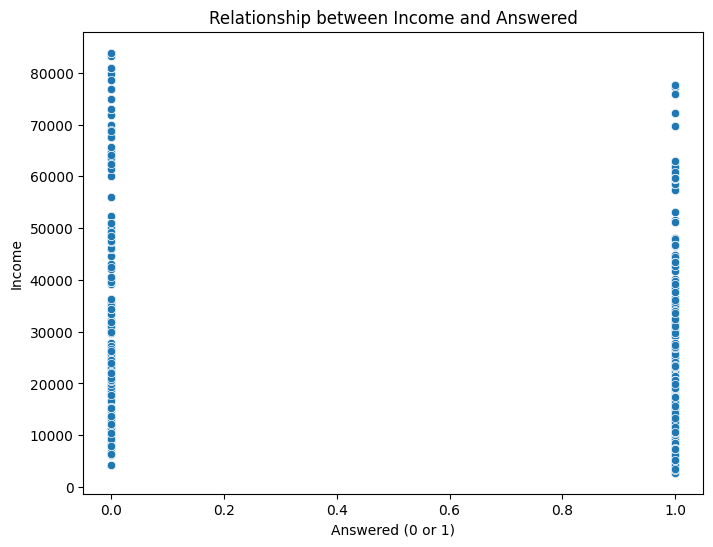

In [14]:
# Chart 1
# Assuming 'df_clean' is your cleaned DataFrame from the previous code
plt.figure(figsize=(8, 6))
sns.scatterplot(x='answered', y='income', data=df_clean)
plt.title('Relationship between Income and Answered')
plt.xlabel('Answered (0 or 1)')
plt.ylabel('Income')
plt.show()

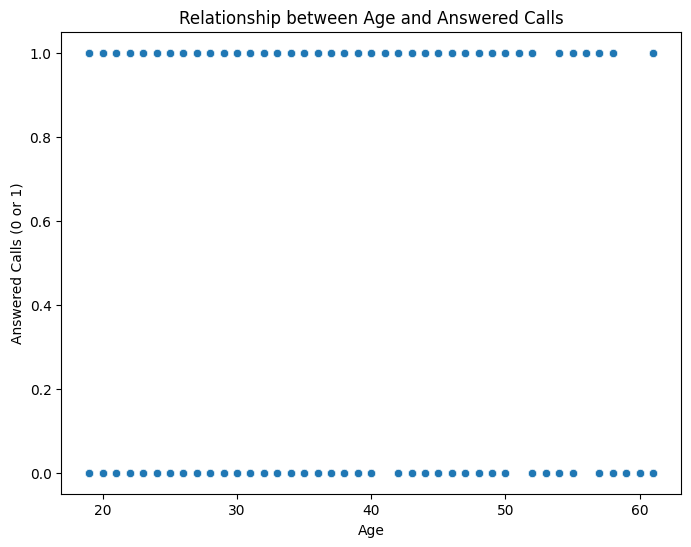

In [15]:
# Chart 2
# prompt: create a chart that shows the relationship between  age and answered calls

plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='answered', data=df_clean)
plt.title('Relationship between Age and Answered Calls')
plt.xlabel('Age')
plt.ylabel('Answered Calls (0 or 1)')
plt.show()


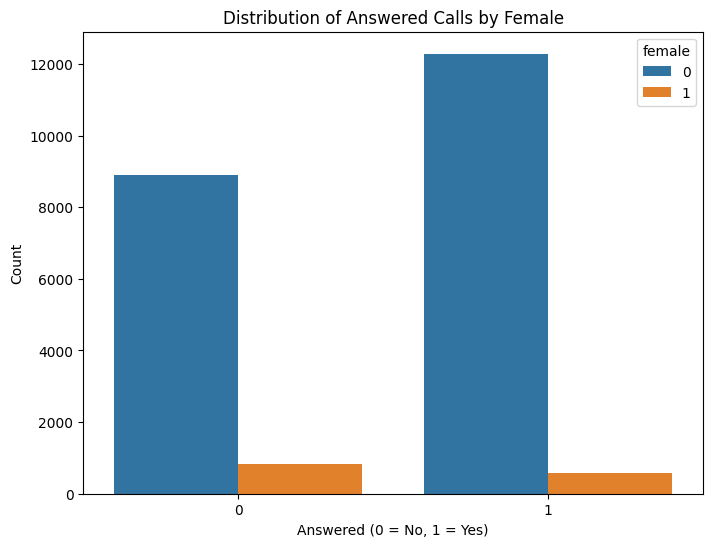

In [16]:
# Chart 3
plt.figure(figsize=(8, 6))
sns.countplot(x='answered', hue='female', data=df_clean)
plt.title('Distribution of Answered Calls by Female')
plt.xlabel('Answered (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

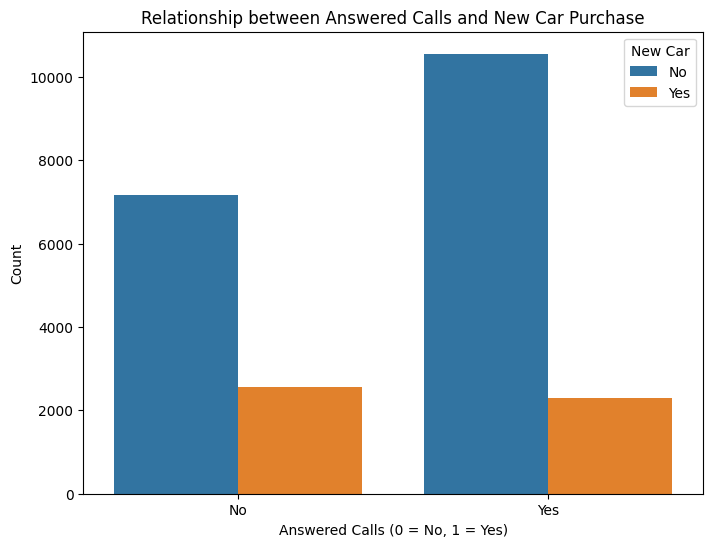

In [18]:
# Assuming 'df_clean' is your cleaned DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='answered', hue='new_car', data=df_clean)
plt.title('Relationship between Answered Calls and New Car Purchase')
plt.xlabel('Answered Calls (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes']) #Replace numerical ticks with labels
plt.legend(title='New Car', labels=['No', 'Yes']) #Customize legend labels
plt.show()


## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?

In [20]:
#get the default probability

base_probability = df_clean['answered'].mean()
print(f"The base probability of someone answering is: {base_probability}")


The base probability of someone answering is: 0.5693792614894182


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [21]:
# Split data into training and testing sets
# Split data into training and testing sets

X = df_clean.drop('answered', axis=1)
y = df_clean['answered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print("Training", X_train.shape)
print("Testing", X_test.shape)


Training (15810, 14)
Testing (6776, 14)


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [22]:
#create a tree
# Assuming 'df' is your DataFrame and 'product' is the target variable
# Features to be used for prediction (excluding the target 'product')
X = df_clean[['product', 'income', 'female', 'age', 'job', 'num_dependents', 'rent',
        'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts']]

# Target variable (what you want to predict)
y = df_clean['answered']

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model with entropy and max_depth=4
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


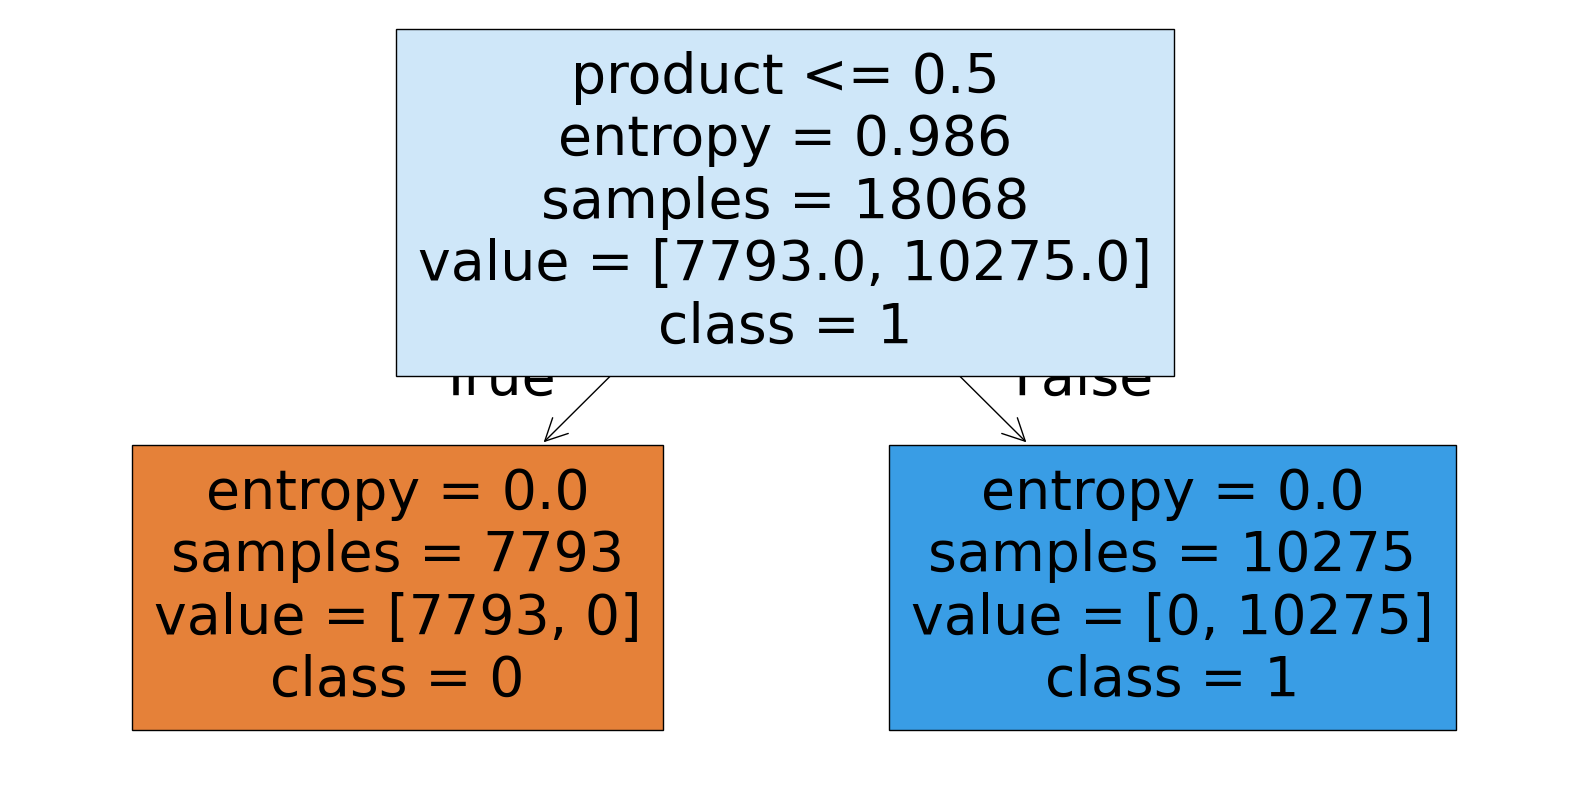

In [27]:
#Display Decision Tree
# prompt: display the decision tree made above


plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0','1'])
plt.show()

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

Accuracy of the decision tree model: 1.0


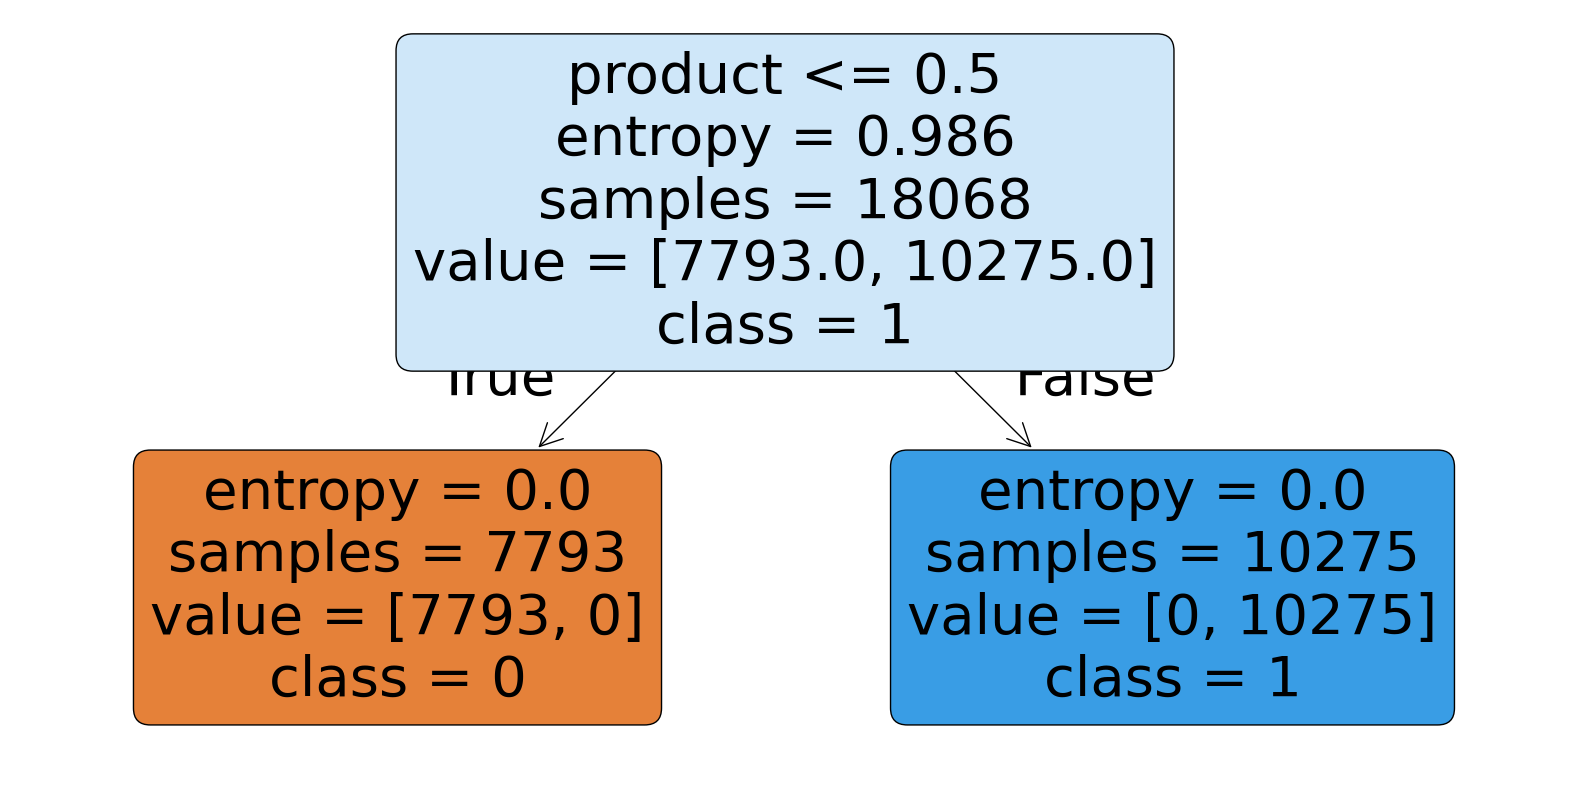

Sample 1: Probability of not answering = 0.0000, Probability of answering = 1.0000
Sample 2: Probability of not answering = 1.0000, Probability of answering = 0.0000
Sample 3: Probability of not answering = 1.0000, Probability of answering = 0.0000
Sample 4: Probability of not answering = 0.0000, Probability of answering = 1.0000
Sample 5: Probability of not answering = 1.0000, Probability of answering = 0.0000


In [28]:
#calculate the probability for your tree
# prompt: display the decision tree made above
X = df_clean[['product', 'income', 'female', 'age', 'job', 'num_dependents', 'rent',
              'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts']]

# Target variable
y = df_clean['answered']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model and print accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the decision tree model: {accuracy}")

# Visualize the decision tree (optional but helpful)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


# Calculate and print probabilities for each node (example for the first 5 test samples)
probabilities = model.predict_proba(X_test[:5])  # probabilities for the first 5 samples in the test set
for i, probs in enumerate(probabilities):
    print(f"Sample {i+1}: Probability of not answering = {probs[0]:.4f}, Probability of answering = {probs[1]:.4f}")



### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

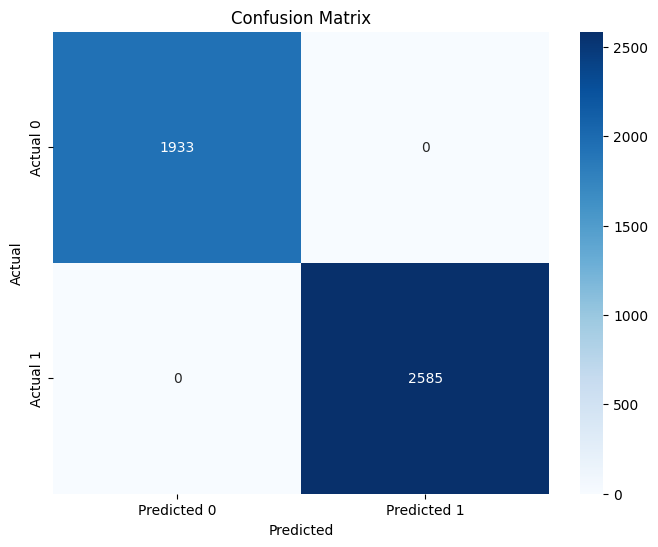

In [29]:
#create a basic confusion matrix
# prompt: create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Create a more visual, interpretable version of the matrix

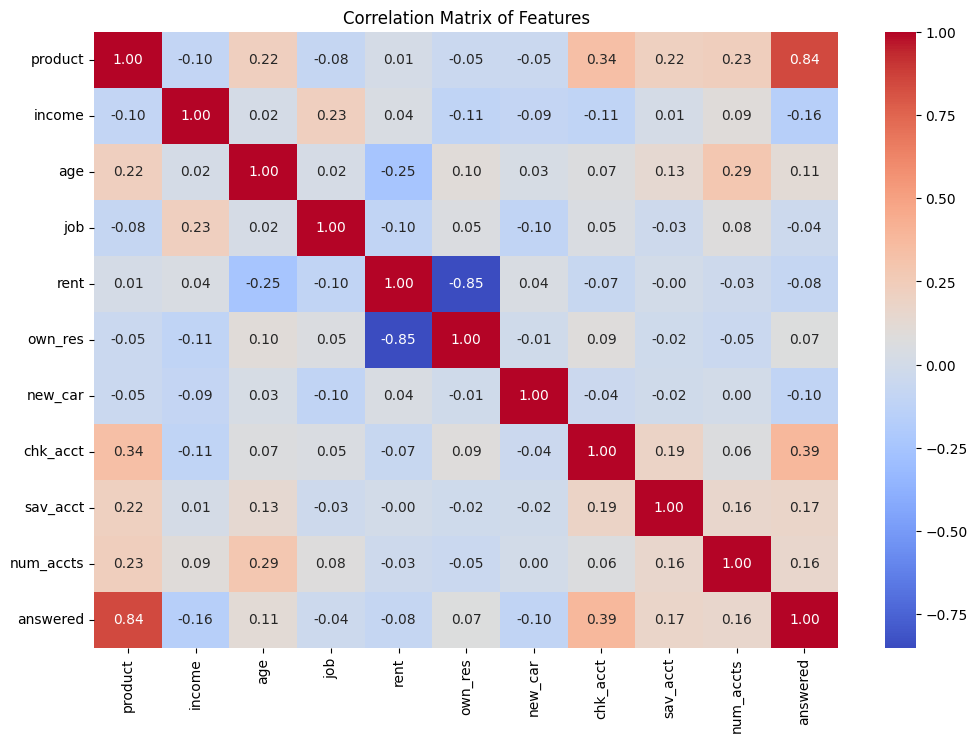

In [30]:
#Create a beautiful matrix; hint - try using Seaborn Heatmap
# Define the features (excluding 'answered' and 'female')
features = ['product', 'income', 'age', 'job','rent',
            'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'answered']

# Create a correlation matrix using the defined features
corr_matrix = df_clean[features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [31]:
# Write a calcuation for the profit from your model
# Write a calcuation for the profit from your model

true_positives = sum((y_pred == 1) & (y_test == 1))
false_positives = sum((y_pred == 1) & (y_test == 0))

profit = (true_positives * 75) - (false_positives * 25)
print(f"The profit from the model is: ${profit}")

The profit from the model is: $193875


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [32]:
#Write a calculation for the overall profit without using the model (default)

# Calculate the total number of customers
total_customers = len(y_test)

# Calculate the number of customers who actually answered
true_positives_default = sum(y_test == 1)

# Calculate the number of customers who did not answer
false_positives_default = sum(y_test == 0)

# Calculate the default profit
default_profit = (true_positives_default * 75) - (false_positives_default * 25)

print(f"The default profit (calling all customers) is: ${default_profit}")

The default profit (calling all customers) is: $145550


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Continue to make changes until you find a set of hyperparameters that improves the accuracy compared to the initial model

Training with best parameters: {'criterion': 'entropy', 'max_depth': 4}
Accuracy of the best decision tree model: 1.0
The profit from the best model is: $193875


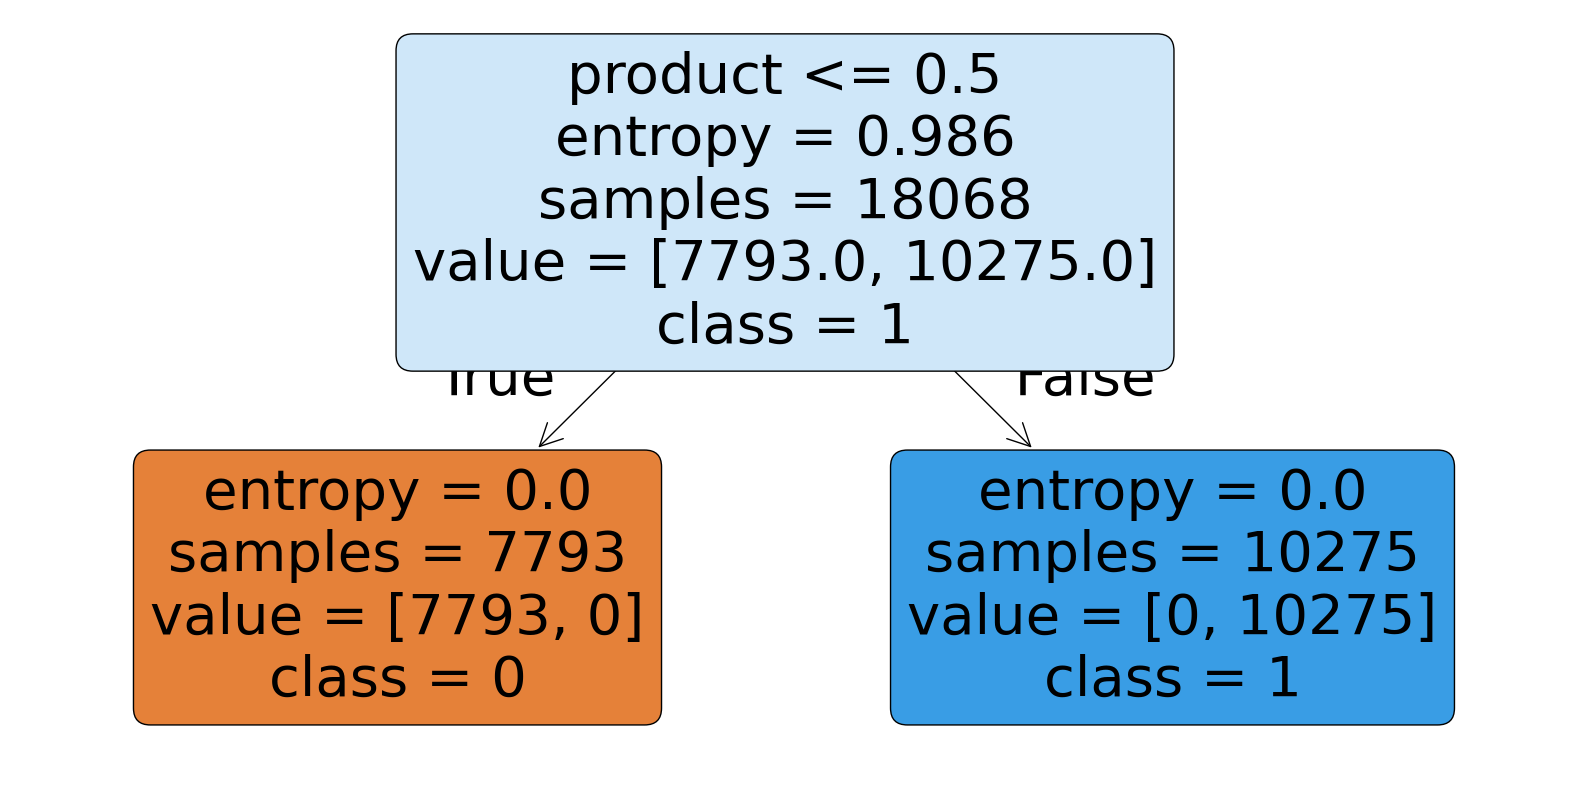

In [34]:
# Create a new version of the tree with new parameters

# Existing code...

# Hyperparameter tuning
best_accuracy = accuracy  # Initialize with the initial accuracy
best_params = {'criterion': 'entropy', 'max_depth': 4}

for criterion in ['gini', 'entropy']:
    for max_depth in range(2, 11):  # Try different max_depth values
        for min_samples_split in range(2, 11): #Try different min samples split values
          for min_samples_leaf in range(1, 11): #Try different min samples leaf values
            model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            current_accuracy = metrics.accuracy_score(y_test, y_pred)

            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
                print(f"Improved accuracy: {best_accuracy} with parameters: {best_params}")

# Train the model with best hyperparameters
print(f"Training with best parameters: {best_params}")
best_model = DecisionTreeClassifier(**best_params, random_state=42) # Use best parameters
best_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the best decision tree model:", accuracy)


# Calculate profit with the best model
true_positives = sum((y_pred == 1) & (y_test == 1))
false_positives = sum((y_pred == 1) & (y_test == 0))
profit = (true_positives * 75) - (false_positives * 25)
print(f"The profit from the best model is: ${profit}")

# Visualize the best decision tree (optional)
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


In [35]:
# Calculate a new probability

# Assuming 'model' is your trained DecisionTreeClassifier and 'X_test' contains your test data
probabilities = model.predict_proba(X_test)

# Example: Calculate the new probability for the first sample in X_test
new_probability = probabilities[0][1]  # Probability of the positive class (answered = 1)
print(f"The new probability for the first sample is: {new_probability}")

# You can loop through all samples to get their individual probabilities
for i, probs in enumerate(probabilities):
    print(f"Sample {i}: Probability of answering = {probs[1]:.4f}")

The new probability for the first sample is: 1.0
Sample 0: Probability of answering = 1.0000
Sample 1: Probability of answering = 0.0000
Sample 2: Probability of answering = 0.0000
Sample 3: Probability of answering = 1.0000
Sample 4: Probability of answering = 0.0000
Sample 5: Probability of answering = 1.0000
Sample 6: Probability of answering = 0.0000
Sample 7: Probability of answering = 1.0000
Sample 8: Probability of answering = 0.0000
Sample 9: Probability of answering = 1.0000
Sample 10: Probability of answering = 1.0000
Sample 11: Probability of answering = 1.0000
Sample 12: Probability of answering = 0.0000
Sample 13: Probability of answering = 1.0000
Sample 14: Probability of answering = 1.0000
Sample 15: Probability of answering = 0.0000
Sample 16: Probability of answering = 1.0000
Sample 17: Probability of answering = 1.0000
Sample 18: Probability of answering = 0.0000
Sample 19: Probability of answering = 1.0000
Sample 20: Probability of answering = 0.0000
Sample 21: Proba

### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable

In [ ]:
#Import new customer data into a new data frame

In [ ]:
#Predict the number of customers who will be yes/no for the target variable

# Step 6: Plan for Deployment
### 6.1: Did we improve our profit using the model?  

Write your conclusion notes below:

### 6.2: How should the model be deployed?

Write your recommendations below: